# 14.0.Udemy_Computer_vision_Jospeh_Portilla_14_KERAS

### Keras CNN with CIFAR10 (color images)

### HouseKeeping

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

### Read data

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 26s 0us/step


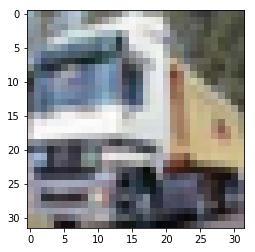

In [5]:
plt.imshow(X_train[1])

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Scaling

In [9]:
X_train.min(), X_train.max()

(0, 255)

In [10]:
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test/ X_test.max()

In [12]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [13]:
X_test_scaled.min(), X_test_scaled.max()

(0.0, 1.0)

### One Hot Encoding

In [14]:
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)   

In [17]:
y_train_categorical.shape, y_test_categorical.shape

((50000, 10), (10000, 10))

### Building Keras Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
cnn_model2 = Sequential()

cnn_model2.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
cnn_model2.add(MaxPool2D(pool_size=(2,2)))
               
cnn_model2.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
cnn_model2.add(MaxPool2D(pool_size=(2,2)))
               
cnn_model2.add(Flatten())
               
cnn_model2.add(Dense(units=256, activation='relu'))
cnn_model2.add(Dense(units=10, activation='softmax'))

cnn_model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
cnn_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [25]:
cnn_model2.fit(x=X_train_scaled, y=y_train_categorical, verbose=1, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 134s 3ms/step - loss: 1.5443 - acc: 0.4461
Epoch 2/5
50000/50000 [==============================] - 110s 2ms/step - loss: 1.1819 - acc: 0.5850
Epoch 3/5
50000/50000 [==============================] - 106s 2ms/step - loss: 1.0256 - acc: 0.6431
Epoch 4/5
50000/50000 [==============================] - 103s 2ms/step - loss: 0.9139 - acc: 0.6843
Epoch 5/5
50000/50000 [==============================] - 102s 2ms/step - loss: 0.8322 - acc: 0.7127


In [27]:
score = cnn_model2.evaluate(X_test_scaled, y_test_categorical)

10000/10000 [==============================] - 13s 1ms/step


In [28]:
score

[1.017450309753418, 0.6514]

In [29]:
predictions = cnn_model2.predict_classes(X_test_scaled)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1000
           1       0.74      0.83      0.78      1000
           2       0.57      0.49      0.53      1000
           3       0.53      0.37      0.43      1000
           4       0.57      0.67      0.61      1000
           5       0.55      0.59      0.57      1000
           6       0.61      0.80      0.69      1000
           7       0.77      0.63      0.69      1000
           8       0.72      0.79      0.76      1000
           9       0.71      0.73      0.72      1000

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



In [33]:
confusion_matrix(y_test, predictions)

array([[615,  44,  62,  17,  24,  12,  22,  15, 122,  67],
       [ 12, 832,   9,   9,   1,   2,  24,   2,  30,  79],
       [ 45,  11, 487,  46, 135,  82, 130,  25,  25,  14],
       [ 20,  20,  62, 369,  89, 219, 134,  30,  28,  29],
       [ 20,  12,  69,  34, 669,  36,  87,  48,  21,   4],
       [ 15,   6,  70, 115,  82, 588,  58,  35,  15,  16],
       [  7,  12,  30,  40,  52,  23, 800,   8,  10,  18],
       [ 13,   8,  27,  42, 112,  89,  33, 626,  12,  38],
       [ 39,  47,  20,  15,  12,  13,  15,   7, 793,  39],
       [ 16, 135,  14,  15,   5,   7,  18,  13,  42, 735]])

### Using saved model from LAB Notes

In [34]:
from keras.models import load_model
lab_model = load_model('../../models/keras/LAB/larger_CIFAR10_model.h5')

In [35]:
lab_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
__________

In [ ]:
#END